<a href="https://colab.research.google.com/github/annabocharovaua/Time-Series-Analysis-Forecasting-and-Machine-Learning/blob/main/Holt_Winters_Amadeus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [30]:
import pandas as pd 
import numpy as np

In [31]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True, delimiter=';')

In [32]:
df.head()

,Passengers
Month,
2011-01-01,112000
2011-02-01,118000
2011-03-01,132000
2011-04-01,129000
2011-05-01,121000


<Axes: xlabel='Month'>

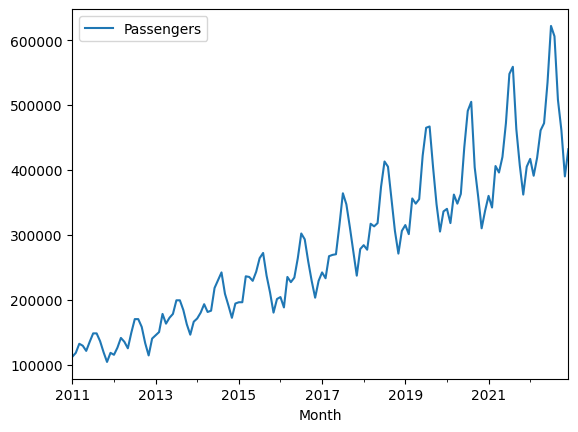

In [33]:
df.plot()

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [35]:
df.index.freq = 'MS'

In [36]:
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [37]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [38]:
hw = ExponentialSmoothing(
    train['Passengers'], 
    initialization_method='legacy-heuristic', 
    trend = 'add', seasonal = 'add', seasonal_periods=12)
res_hw = hw.fit()
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [39]:
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)

<Axes: xlabel='Month'>

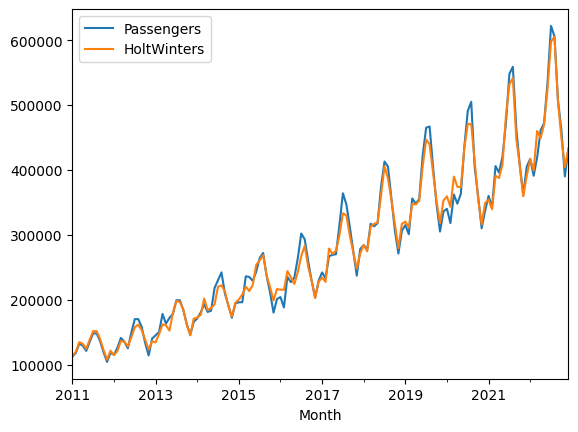

In [40]:
df[['Passengers','HoltWinters']].plot()

In [41]:
def rmse(y, t) : 
  return np.sqrt(np.mean((y-t)**2))

In [42]:
def mae(y, t): 
  return np.mean(np.abs(y-t))

In [51]:
print("Train RMSE: ", rmse(train['Passengers'],res_hw.fittedvalues))
print("Test RMSE: ", rmse(test['Passengers'],res_hw.forecast(N_test)))
print("Train MAE: ", mae(train['Passengers'],res_hw.fittedvalues))
print("Test MAE: ", mae(test['Passengers'],res_hw.forecast(N_test)))


Train RMSE:  9901.051996095224
Test RMSE:  18121.654934664402
Train MAE:  7404.9969614072825
Test MAE:  12171.157632659824


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='Month'>

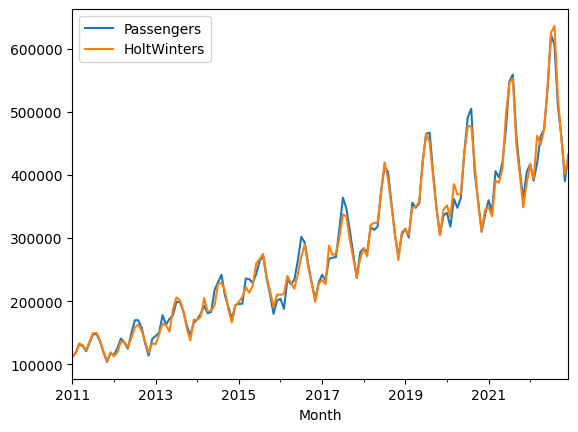

In [45]:
hw = ExponentialSmoothing(
    train['Passengers'], 
    initialization_method='legacy-heuristic', 
    trend = 'add', seasonal = 'mul', seasonal_periods=12)
res_hw = hw.fit()
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)
df[['Passengers','HoltWinters']].plot()

In [52]:
print("Train RMSE: ", rmse(train['Passengers'],res_hw.fittedvalues))
print("Test RMSE: ", rmse(test['Passengers'],res_hw.forecast(N_test)))
print("Train MAE: ", mae(train['Passengers'],res_hw.fittedvalues))
print("Test MAE: ", mae(test['Passengers'],res_hw.forecast(N_test)))


Train RMSE:  9901.051996095224
Test RMSE:  18121.654934664402
Train MAE:  7404.9969614072825
Test MAE:  12171.157632659824


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='Month'>

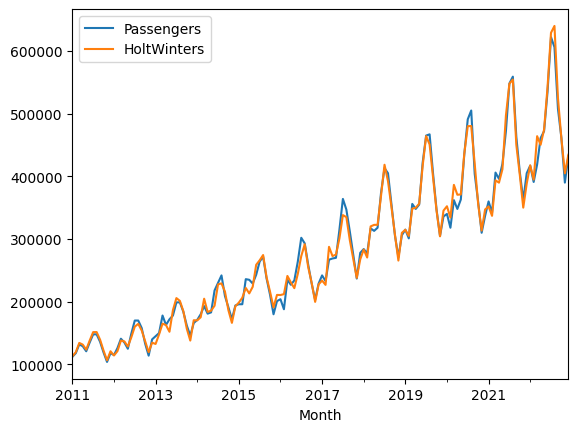

In [48]:
hw = ExponentialSmoothing(
    train['Passengers'], 
    initialization_method='legacy-heuristic', 
    trend = 'mul', seasonal = 'mul', seasonal_periods=12)
res_hw = hw.fit()
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)
df[['Passengers','HoltWinters']].plot()

In [53]:
print("Train RMSE: ", rmse(train['Passengers'],res_hw.fittedvalues))
print("Test RMSE: ", rmse(test['Passengers'],res_hw.forecast(N_test)))
print("Train MAE: ", mae(train['Passengers'],res_hw.fittedvalues))
print("Test MAE: ", mae(test['Passengers'],res_hw.forecast(N_test)))

Train RMSE:  9901.051996095224
Test RMSE:  18121.654934664402
Train MAE:  7404.9969614072825
Test MAE:  12171.157632659824


In [50]:
print("Train MAE: ", mae(train['Passengers'],res_hw.fittedvalues))
print("Test MAE: ", mae(test['Passengers'],res_hw.forecast(N_test)))


Train MAE:  7404.9969614072825
Test MAE:  12171.157632659824
